In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# Настройка параметров
batch_size = 2
learning_rate = 1e-3
num_epochs = 20
image_size = (2432, 2432)
data_dir = 'C:/Users/kimsl/VKR/1/dataset_prepro_autoencoder'  # Укажите путь к вашему датасету

# Создание набора данных
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = [os.path.join(img_dir, fname) for fname in os.listdir(img_dir) if fname.endswith('.jpg')]

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

dataset = CustomImageDataset(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Создание модели автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1), # 300x300
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 150x150
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 75x75
            nn.ReLU(True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1), # 38x38
            nn.ReLU(True),
            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1), # 19x19
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1), # 38x38
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1), # 75x75
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 150x150
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1), # 300x300
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1), # 600x600
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели, оптимизатора и функции потерь
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


losses = []
# Обучение модели
for epoch in range(num_epochs):
    for data in dataloader:
        img = data.to(device)
        output = model(img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      # Storing the losses in a list for plotting
        losses.append(loss)
        torch.cuda.empty_cache()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')
    


C:\Users\kimsl\PycharmProjects\VKR\venv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
C:\Users\kimsl\PycharmProjects\VKR\venv\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


KeyboardInterrupt: 

ДООБУЧЕНИЕ

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# Настройка параметров
batch_size = 2
learning_rate = 1e-3
num_epochs = 20
image_size = (2432, 2432)
data_dir = 'C:/Users/kimsl/VKR/2'  # Укажите путь к вашему датасету

# Создание набора данных
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = [os.path.join(img_dir, fname) for fname in os.listdir(img_dir) if fname.endswith('.jpg')]

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

dataset = CustomImageDataset(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Создание модели автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1), # 300x300
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 150x150
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 75x75
            nn.ReLU(True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1), # 38x38
            nn.ReLU(True),
            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1), # 19x19
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1), # 38x38
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1), # 75x75
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 150x150
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1), # 300x300
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1), # 600x600
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели, оптимизатора и функции потерь
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
model.load_state_dict(torch.load('autoencoder5.pth'))

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


losses = []
# Обучение модели
for epoch in range(num_epochs):
    for data in dataloader:
        img = data.to(device)
        output = model(img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      # Storing the losses in a list for plotting
        losses.append(loss)
        torch.cuda.empty_cache()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')
    

C:\Users\kimsl\PycharmProjects\VKR\venv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
C:\Users\kimsl\PycharmProjects\VKR\venv\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1/20], Loss: 0.004069
Epoch [2/20], Loss: 0.002220


OutOfMemoryError: CUDA out of memory. Tried to allocate 722.00 MiB. GPU 

In [2]:
# Сохранение модели
torch.save(model.state_dict(), 'autoencoder5.pth')

C:\Users\kimsl\PycharmProjects\VKR\venv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


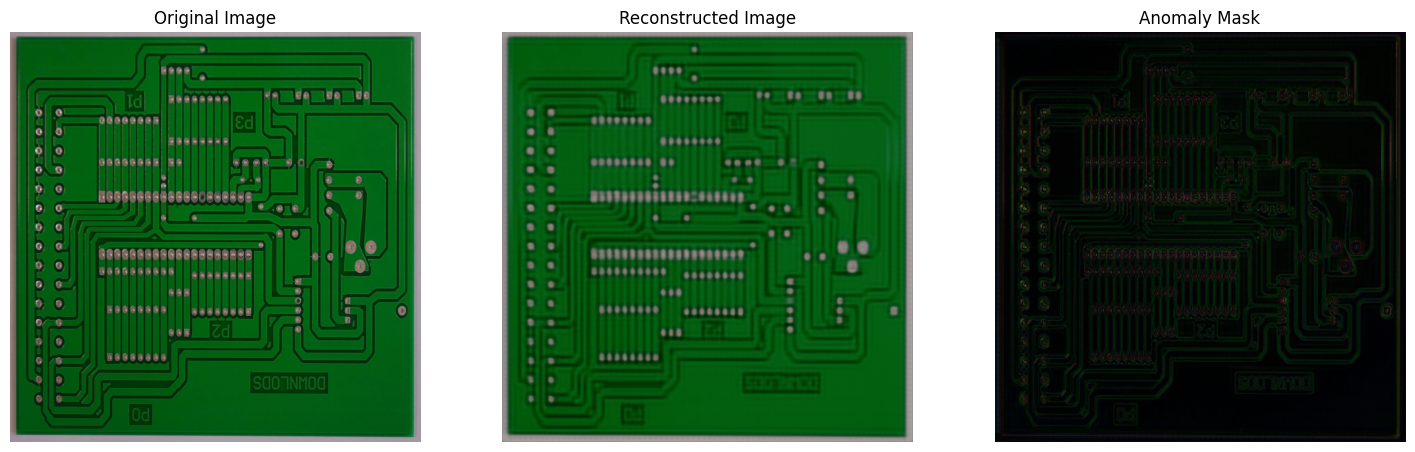

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Настройка параметров
image_size = (2432, 2432)
model_path = 'autoencoder4.pth'  # Путь к сохраненной модели
# image_path = "C:/Users/kimsl/VKR/PCB_DATASET/images/Open_circuit/04_open_circuit_01.jpg" # Путь к изображению для сравнения
image_path = "C:/Users/kimsl/VKR/PCB_DATASET/images/Missing_hole/04_missing_hole_01.jpg"
# Определение модели автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1), # 300x300
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 150x150
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 75x75
            nn.ReLU(True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1), # 38x38
            nn.ReLU(True),
            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1), # 19x19
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1), # 38x38
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1), # 75x75
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 150x150
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1), # 300x300
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1), # 600x600
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели и загрузка весов
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Функция для загрузки и предобработки изображения
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    if transform:
        image = transform(image)
    return image

# Преобразования для изображения
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

# Загрузка изображения
input_image = load_image(image_path, transform=transform).unsqueeze(0).to(device)

# Прямой проход через модель
with torch.no_grad():
    reconstructed_image = model(input_image)

# Перевод тензоров в формат для визуализации и вычисление маски аномалий
input_image_np = input_image.cpu().squeeze().permute(1, 2, 0).numpy()
reconstructed_image_np = reconstructed_image.cpu().squeeze().permute(1, 2, 0).numpy()

# Преобразование реконструированного изображения в формат PIL
reconstructed_image_pil = Image.fromarray((reconstructed_image_np * 255).astype(np.uint8))

# Изменение размера реконструированного изображения
resized_reconstructed_image_pil = reconstructed_image_pil.resize((2432, 2432))

# Преобразование измененного изображения обратно в numpy
resized_reconstructed_image_np = np.array(resized_reconstructed_image_pil) / 255.0

anomaly_mask = np.abs(input_image_np - resized_reconstructed_image_np)

# Визуализация оригинального изображения, реконструированного изображения и маски аномалий
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(input_image_np)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_image_np)
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

axes[2].imshow(anomaly_mask, cmap='hot')
axes[2].set_title('Anomaly Mask')
axes[2].axis('off')

plt.show()